# CFD FINAL PROJECT NOTEBOOK
### Plots and calculations
Calls from Blood_model_validation.py to validate and plot different aspects of the project. <br>
Plots and descriptions for final report.

In [11]:
### Import Statements
from Blood_model_validation import blood_model_validation, Q_
import numpy as np
import math
# from pint import UnitRegistry
# ureg = UnitRegistry()
# Q_ = ureg.Quantity
import pandas as pd
import matplotlib.pyplot as plt



In [12]:
### Instantiate Class
shear_range = np.arange(1,500)
Parameters_BM_Class = {'Q_': Q_,
                           'strain': 450, # Pass universal strain for all models
                           'strain_range': shear_range,
                           'mu_0': 0.056,
                           'mu_inf': 0.0035}

bm = blood_model_validation(**Parameters_BM_Class)

The blood_model_validation class takes kwargs as input to better change parameters when evaluating viscosity over a range of shear stresses.

### Inlet Boundary Velocity

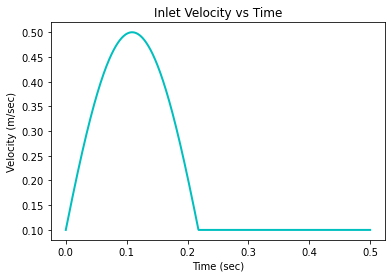

In [13]:
bm.inlet_profile()

### Plot Predicted Viscosity vs Shear Rate

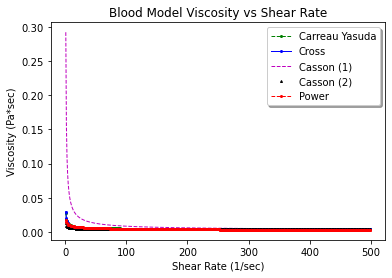

In [14]:
predicted_mu = bm.mu_calculations()

Plot of shear dependant viscosity models from literature. <br>
Casson (1) was found to have incorrect parameters leading to running the casson simulation again with the Casson (2) formulation.

### Avg Viscosity & Shear Rate wrt Time Over Entire Domain

In [ ]:
sim_strain_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/FDA_Blood_Pump/EML_4930/EML_4930/Data/Shear_stress_df.csv')
sim_strain_visc_df = bm.compute_sim_viscosity(sim_strain_df)

#bm.plot_viscosity_time()
#bm.plot_shear_time()
#bm.plot_viscosity_vs_shear()

### Avg Viscosity & Shear Rate wrt Time at Walls

In [15]:
sim_wall_strain_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/FDA_Blood_Pump/EML_4930/EML_4930/Data/Shear_stress_df.csv')
sim_wall_strain_visc_df = bm.compute_sim_viscosity(sim_wall_strain_df)

#bm.plot_viscosity_time()
#bm.plot_shear_time()
#bm.plot_viscosity_vs_shear()


Time [ s ]
Casson  [ s^-1 ]
Cross  [ s^-1 ]
CY  [ s^-1 ]
Newtownian  [ s^-1 ]


### Wall Shear Stress Values

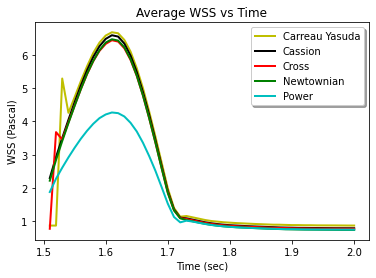

In [16]:
avg_wss_df =pd.read_csv('https://raw.githubusercontent.com/jtarriela/FDA_Blood_Pump/EML_4930/EML_4930/Data/Raw_Data_2/Average_Wall_Shear_Stress_vs_Time.csv')
bm.plot_wss(avg_wss_df)

### Residual Analysis

In [17]:
# net_mass_flow_df = pd.read_csv('https://raw.githubusercontent.com/jtarriela/FDA_Blood_Pump/EML_4930/EML_4930/Data/Raw_Data_2/Average_Wall_Shear_Stress_vs_Time.csv')
# bm.plot_mass_resid(net_mass_flow_df)
